<a href="https://colab.research.google.com/github/mrSaggio/mrSaggio/blob/main/resNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/MyDrive/list_digital')

['Annotations', 'JPEGImages']

In [7]:
import glob
images_path = glob.glob('/content/drive/MyDrive/list_digital/JPEGImages/*.jpg')
print(len(images_path))
images_path[:9]

64


['/content/drive/MyDrive/list_digital/JPEGImages/frame_orig13456.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig11857.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig17891.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig19078.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig7621.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig4288.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig19085.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig18713.jpg',
 '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig11504.jpg']

In [8]:
xmls_path = glob.glob('/content/drive/MyDrive/list_digital/Annotations/*.xml')
print(len(xmls_path))
xmls_path[:9]

64


['/content/drive/MyDrive/list_digital/Annotations/frame_orig11502.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig17891.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig18698.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig18706.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig19077.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig19088.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig18702.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig19079.xml',
 '/content/drive/MyDrive/list_digital/Annotations/frame_orig18715.xml']

In [9]:
xmls_data = [p.split('/')[-1].split('.')[0] for p in xmls_path]
images_data = [img for img in images_path if (img.split('/')[-1].split)('.jpg')[0] in xmls_data]

len(images_data),len(xmls_path)


(64, 64)

In [10]:
xmls_path.sort(key=lambda x: x.split("/")[-1].split('.xml')[0])
images_data.sort(key=lambda x: x.split("/")[-1].split('.jpg')[0])
xmls_path[:9],images_data[:9]

(['/content/drive/MyDrive/list_digital/Annotations/frame_orig11502.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig11504.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig11857.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig13456.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig13845.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig1694.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig17887.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig17888.xml',
  '/content/drive/MyDrive/list_digital/Annotations/frame_orig17889.xml'],
 ['/content/drive/MyDrive/list_digital/JPEGImages/frame_orig11502.jpg',
  '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig11504.jpg',
  '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig11857.jpg',
  '/content/drive/MyDrive/list_digital/JPEGImages/frame_orig13456.jpg',
  '/content/drive/MyDrive/list_digital/JPEGImages/frame

In [11]:
import xml.etree.ElementTree as ET
import glob
import re
import torch

def encoded_vec(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    name_counts = {}
    vector = torch.zeros(10, dtype=torch.float32)

    for obj in root.findall('.//object'):
        names = obj.findall('.//name')

        if names:
            for name in names:
                digit_match = re.search(r'\d', name.text)

                if digit_match:
                    digit = int(digit_match.group())
                    vector[digit] = 1

    return vector

labels = []
for xml_path in xmls_path:
    label = encoded_vec(xml_path)
    labels.append(label)

labels_tensor = torch.stack(labels)
print(labels_tensor)


tensor([[1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],


In [ ]:
!pip install torch torchvision

In [12]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        #label = torch.tensor(self.labels[idx], dtype=torch.float32)
        label = self.labels[idx].clone().detach().to(torch.float32)

        img = Image.open(img_path)
        if self.transform:
            img = self.transform(img)

        return img, label

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

custom_dataset = CustomDataset(images_data, labels_tensor, transform=transform)

train_size = int(0.7 * len(custom_dataset))
val_test_size = len(custom_dataset) - train_size
train_dataset, remaining_dataset = torch.utils.data.random_split(custom_dataset, [train_size, val_test_size])

val_size = int(0.5 * len(remaining_dataset))
test_size = len(remaining_dataset) - val_size
val_dataset, test_dataset = torch.utils.data.random_split(remaining_dataset, [val_size, test_size])

batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# for img, label in train_dataloader:
#     # img is a batch of preprocessed images
#     # label is a batch of labels
#     # Your training logic goes here
#     pass


In [13]:
first_batch = next(iter(train_dataloader))

#print(f"Sample:\n{batch['sample']}")
#print(f"Target:\n{batch['target']}")

for index, value in enumerate(first_batch):
    print(f"Element {index}: {value}")


Element 0: tensor([[[[-1.8782, -1.8268, -1.6213,  ..., -1.9467, -1.9467, -1.9295],
          [-1.8610, -1.6898, -1.4158,  ..., -1.9467, -1.9467, -1.9467],
          [-1.7069, -1.5357, -1.3815,  ..., -1.9467, -1.9467, -1.9638],
          ...,
          [-1.5014, -1.4672, -1.4329,  ..., -1.4672, -1.4329, -1.7069],
          [-1.5014, -1.4843, -1.4500,  ..., -1.4672, -1.4500, -1.6727],
          [-1.4672, -1.4843, -1.4329,  ..., -1.5014, -1.4158, -1.4158]],

         [[-1.7906, -1.7381, -1.5280,  ..., -1.8606, -1.8606, -1.8431],
          [-1.7731, -1.5980, -1.3179,  ..., -1.8606, -1.8606, -1.8606],
          [-1.6155, -1.4405, -1.2829,  ..., -1.8606, -1.8606, -1.8782],
          ...,
          [-1.4055, -1.3704, -1.3354,  ..., -1.3704, -1.3354, -1.6155],
          [-1.4055, -1.3880, -1.3529,  ..., -1.3704, -1.3529, -1.5805],
          [-1.3704, -1.3880, -1.3354,  ..., -1.4055, -1.3179, -1.3179]],

         [[-1.5604, -1.5081, -1.2990,  ..., -1.6302, -1.6302, -1.6127],
          [-1.5430,

In [14]:
first_batch[0].shape

torch.Size([44, 3, 224, 224])

In [15]:
import torch
import torchvision.models as models
import torch.nn as nn

pretrained_model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 121MB/s]


In [16]:
print(pretrained_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
#number_features = pretrained_model.fc.in_features
num_classes = 10
pretrained_model.fc = nn.Sequential(
    nn.Linear(2048, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes),
    #nn.ModuleList([nn.Sigmoid() for _ in range(10)])
    nn.Sigmoid()
    #nn.LogSoftmax(dim=1)
)
print(pretrained_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
import torch.optim as optim
#Loss = nn.CrossEntropyLoss()
Loss = nn.BCELoss()
#optimizer = optim.SGD(pretrained_model.parameters(), lr=0.01)
optimizer = optim.SGD(pretrained_model.parameters(), lr=0.01,  momentum=0.9)
#scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 15], gamma=0.01)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_model = pretrained_model.to(device)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
def test(model, loader):
    loss_log, acc_log, prec_log, recall_log, f1_log = [], [], [], [], []

    model.eval()

    with torch.no_grad():
        for data, target in loader:
            inputs, labels = data.to(device), target.to(device)

            outputs = model(inputs)
            loss = Loss(outputs, labels)
            outputs = [[1 if val > 0.5 else 0 for val in inner_list] for inner_list in outputs]
            outputs = torch.tensor(outputs).float()

            accuracy = accuracy_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), normalize = True)
            precision = precision_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')
            recall = recall_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')
            f1 = f1_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')

            loss_log.append(loss.item())
            prec_log.append(precision.item())
            acc_log.append(accuracy.item())
            recall_log.append(recall.item())
            f1_log.append(f1.item())

    return np.mean(loss_log), np.mean(prec_log),np.mean(acc_log), np.mean(recall_log), np.mean(f1_log)

In [20]:
def train_epoch(model, optimizer, train_loader):
    loss_log, acc_log, prec_log, recall_log, f1_log = [], [], [], [], []

    model.train()

    for data, target in train_loader:
        inputs, labels = data.to(device), target.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = Loss(outputs, labels)
        outputs = [[1 if val > 0.5 else 0 for val in inner_list] for inner_list in outputs]
        outputs = torch.tensor(outputs).float()
        #print(f"Outputs {outputs}")
        #print(f"Labels {labels}")

        #precision, recall, f1, accuracy = calculate_metrics(outputs, labels)

        accuracy = accuracy_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), normalize = True)
        precision = precision_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')
        recall = recall_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')
        f1 = f1_score(y_true = labels.cpu().detach().numpy(), y_pred = outputs.cpu().detach().numpy(), average = 'samples')

        loss.backward()
        optimizer.step()

        loss_log.append(loss.item())
        acc_log.append(accuracy.item())
        prec_log.append(precision.item())
        recall_log.append(recall.item())
        f1_log.append(f1.item())

    return loss_log, acc_log, prec_log, recall_log, f1_log


In [21]:
def train(model, optimizer, n_epochs, train_loader, val_loader, scheduler=None):
    train_loss_log, train_acc_log, train_prec_log, train_recall_log, train_f1_log = [], [], [], [], []
    val_loss_log, val_acc_log, val_prec_log, val_recall_log, val_f1_log = [], [], [], [], []

    for epoch in range(n_epochs):
        train_loss, train_acc, train_prec, train_recall, train_f1 = train_epoch(model, optimizer, train_loader)
        val_loss, val_acc, val_prec, val_recall, val_f1 = test(model, val_loader)

        train_loss_log.append(np.mean(train_loss))
        train_acc_log.append(np.mean(train_acc))
        train_prec_log.append(np.mean(train_prec))
        train_recall_log.append(np.mean(train_recall))
        train_f1_log.append(np.mean(train_f1))

        val_loss_log.append(val_loss)
        val_acc_log.append(val_acc)
        val_prec_log.append(val_prec)
        val_recall_log.append(val_recall)
        val_f1_log.append(val_f1)

        print(f"Epoch {epoch}")
        print(f" Train loss: {np.mean(train_loss)}, Train accuracy: {np.mean(train_acc)}, Train precision: {np.mean(train_prec)}, Train recall: {np.mean(train_recall)}, Train F1: {np.mean(train_f1)}")
        print(f" Validation loss: {val_loss}, Validation accuracy: {val_acc}, Validation precision: {val_prec}, Validation recall: {val_recall}, Validation F1: {val_f1}\n")

        if scheduler is not None:
            scheduler.step()

    return train_loss_log, train_acc_log, train_prec_log, train_recall_log, train_f1_log, val_loss_log, val_acc_log, val_prec_log, val_recall_log, val_f1_log


In [22]:
num_epochs = 30
train_loss_log, train_acc_log, train_prec_log, train_recall_log, train_f1_log, val_loss_log, val_acc_log, val_prec_log, val_recall_log, val_f1_log = train(pretrained_model, optimizer, num_epochs, train_dataloader, val_dataloader)

Epoch 0
 Train loss: 0.6959754228591919, Train accuracy: 0.0, Train precision: 0.7822510822510822, Train recall: 0.5189393939393938, Train F1: 0.6120949794412363
 Validation loss: 0.6666590571403503, Validation accuracy: 0.8678571428571429, Validation precision: 0.0, Validation recall: 0.825, Validation F1: 0.845

Epoch 1
 Train loss: 0.6752739548683167, Train accuracy: 0.0, Train precision: 0.853896103896104, Train recall: 0.6212121212121212, Train F1: 0.7098939607629448
 Validation loss: 0.641834557056427, Validation accuracy: 0.875, Validation precision: 0.0, Validation recall: 0.875, Validation F1: 0.875

Epoch 2
 Train loss: 0.6438794136047363, Train accuracy: 0.09090909090909091, Train precision: 0.9019209956709957, Train recall: 0.8030303030303031, Train F1: 0.8428082946465298
 Validation loss: 0.6082441806793213, Validation accuracy: 0.8763888888888889, Validation precision: 0.0, Validation recall: 0.8875, Validation F1: 0.8816176470588235

Epoch 3
 Train loss: 0.60890924930572

In [23]:
pretrained_model.eval()

test_loss, test_acc, test_prec, test_recall, test_f1 = test(pretrained_model, test_dataloader)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test Precision: {test_prec}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Loss: 0.011582281440496445
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


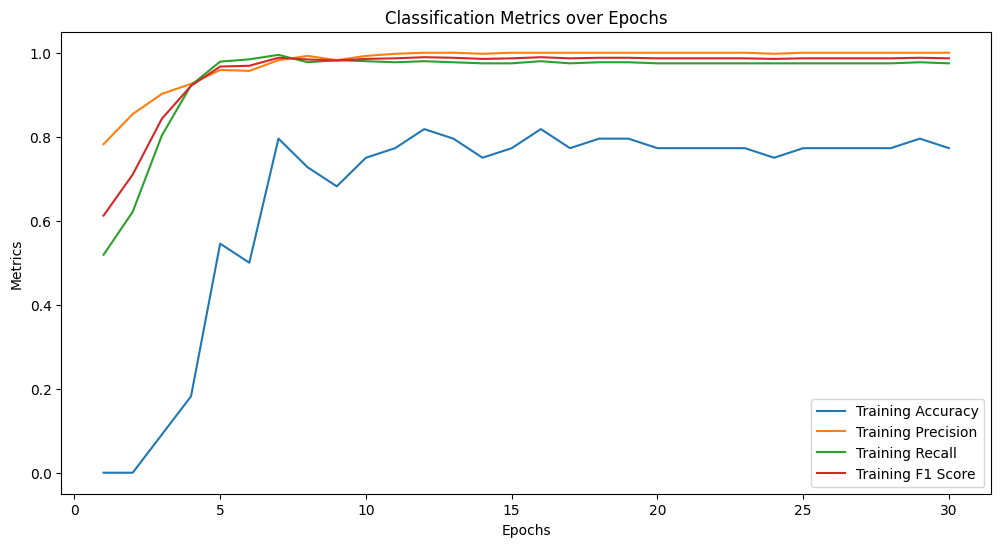

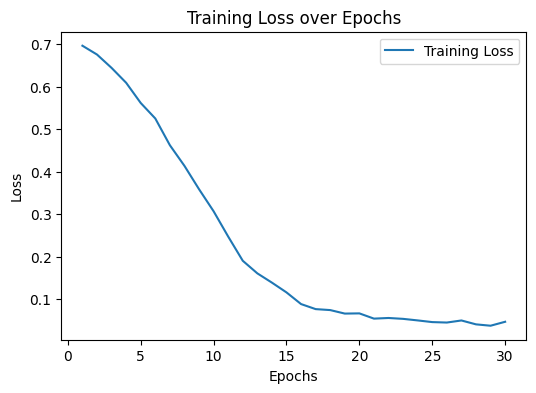

In [24]:
import matplotlib.pyplot as plt

epochs = list(range(1, len(train_loss_log) + 1))

# График метрик
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc_log, label='Training Accuracy')
plt.plot(epochs, train_prec_log, label='Training Precision')
plt.plot(epochs, train_recall_log, label='Training Recall')
plt.plot(epochs, train_f1_log, label='Training F1 Score')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Classification Metrics over Epochs')
plt.legend()
plt.show()

# График функции потерь
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss_log, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


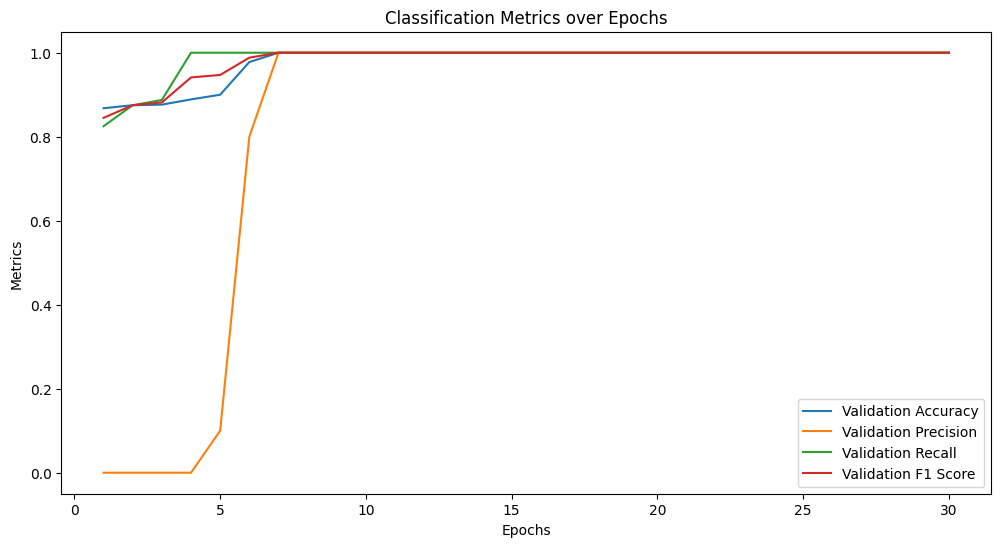

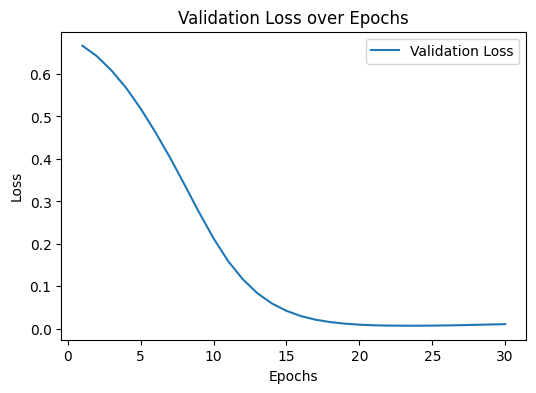

In [25]:

# График метрик
plt.figure(figsize=(12, 6))
plt.plot(epochs, val_acc_log, label='Validation Accuracy')
plt.plot(epochs, val_prec_log, label='Validation Precision')
plt.plot(epochs, val_recall_log, label='Validation Recall')
plt.plot(epochs, val_f1_log, label='Validation F1 Score')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Classification Metrics over Epochs')
plt.legend()
plt.show()

# График функции потерь
plt.figure(figsize=(6, 4))
plt.plot(epochs, val_loss_log, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()